In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 'large',
    'figure.dpi': 100,
})

In [36]:
# Import all measurements from the `./measurements` directory. Each measurement file
# is read into a numpy array (column-first) and added to the `meas_dict` (keys are
# filenames with extentions removed).
meas_dir = os.fsencode('./measurements')
meas_dict = {}
for fname in os.listdir(meas_dir):
    with open(os.path.join(meas_dir, fname)) as file:
        meas = [[float(el) for el in row.rstrip().split(',')]
                for row in file.readlines()]
        meas_name = os.fsdecode(fname).removesuffix('.csv')
        meas_dict[meas_name] = np.array(meas).T

In [37]:
_, pts_21 = meas_dict['2021']
_, pts_22 = meas_dict['2022']
pts_22 = pts_22[pts_22 > 0]

In [38]:
np.mean(pts_21), np.mean(pts_22)

(1.5875000000000001, 1.384433962264151)

In [39]:
np.median(pts_21), np.median(pts_22)

(1.625, 1.375)

In [40]:
count_21, edges_21 = np.histogram(pts_21)

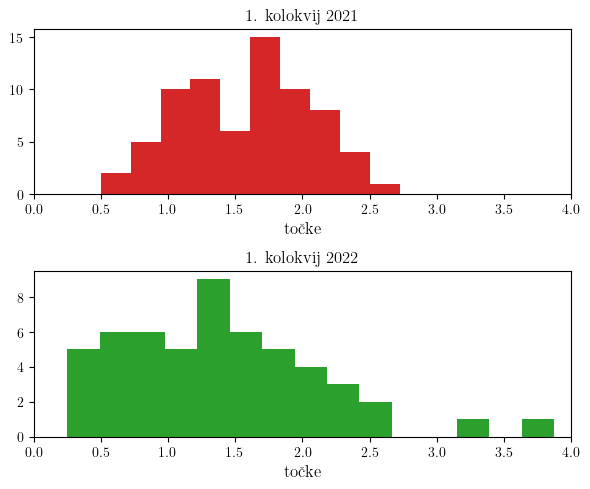

In [41]:
fig, axs = plt.subplots(2, 1, figsize=[6, 5])
axs[0].hist(pts_21, bins=10, color='tab:red')
axs[1].hist(pts_22, bins=15, color='tab:green')

axs[0].set_title(r'1. kolokvij 2021')
axs[0].set_xlabel(r'točke')
axs[0].set_xlim((0, 4))
axs[1].set_title(r'1. kolokvij 2022')
axs[1].set_xlabel(r'točke')
axs[1].set_xlim((0, 4))
fig.tight_layout()